In [1]:
import numpy as np


In [2]:
import pandas as pd


import seaborn as sns

In [46]:
dataframe = pd.read_csv('marketing_customer_analysis.csv')

In [47]:
# defined a function to do all the data transformation in one command:
def cleanup(x):
    print(" ")
    print("here is the head:")
    print(" ")
    print(x.head())
    print(" ")
    print("here is the shape:")
    print(" ")
    print(x.shape)
    cols = []
    for i in range(len(x.columns)):
        cols.append(x.columns[i].lower().replace(' ','_'))
    x.columns = cols
    print(" ")
    print("here are the cleaned standardized colums:")
    print(" ")
    print(x.columns)
    print(" ")
    print("here are all numerical columns:")
    print(" ")
    print(x._get_numeric_data().columns)
    print(" ")
    print("here are all categorical columns:")
    print(" ")
    print(x.drop(columns=x._get_numeric_data().columns))
    print(" ")
    print("here are all nan values:")
    print(" ")
    print(x.isna().sum())
    print(" ")
    print("now we extract the dates from the effective do date column and enter them in a new one while converting them to actual months")
    print(" ")
    x['month'] = pd.DatetimeIndex(x['effective_to_date']).month
    print(" ")
    def month(a):
        if a == 1:
            return 'jan'
        elif a == 2:
            return 'feb'
        else:
            return 0
    x['month']=list(map(month,x['month']))
    print(x.head())

In [48]:
cleanup(dataframe)

 
here is the head:
 
  Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                        

DataFrame info.
* Describe DataFrame.
* Show a plot of the total number of responses broken down by response kind.
* Show a plot of the response rate number of responses by the sales channel.
* Show a plot of the response rate by the total claim amount. Show a plot of the distribution of the total claim amount, broken down by response kind. Try a boxplot and distribution plot, for each response kind. For the distribution plot, try to plot both kinds of responses in one chart (you can try with seaborn's histplot, using the hue parameter).
* Show a plot of the response rate by income. Create similar plots like in the task before, but for Income
* NEW: Create a scatterplot between total claim amount and income. Play around with the parameters of the scatterplot (markersize? alpha?) and try to identify more features within the data just visually. 

In [74]:
dataframe.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,feb
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,jan
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,feb
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,jan
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,feb


In [75]:
dataframe.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [76]:
#show plot of local number of responses
dataframe.response.value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

<AxesSubplot:>

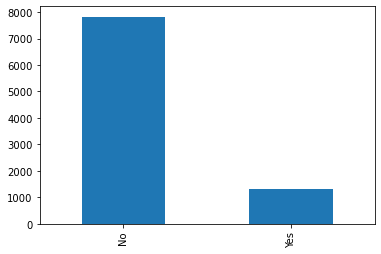

In [77]:
# bar plot for responses
dataframe['response'].value_counts().plot(kind="bar")


<AxesSubplot:>

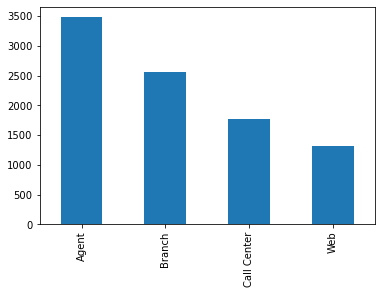

In [78]:
# Responses by sales channels
dataframe.sales_channel.value_counts().plot(kind="bar")

<AxesSubplot:xlabel='response', ylabel='total_claim_amount'>

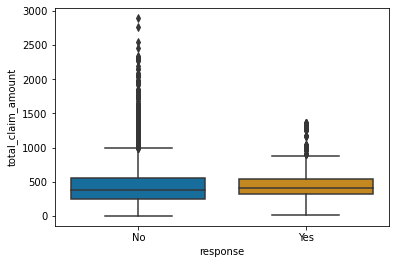

In [79]:
# Plot of the distribution of the total claim amount, broken down by response kind
sns.boxplot(y='total_claim_amount', x='response', data=dataframe, palette='colorblind')

C:\Users\Jennipher\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

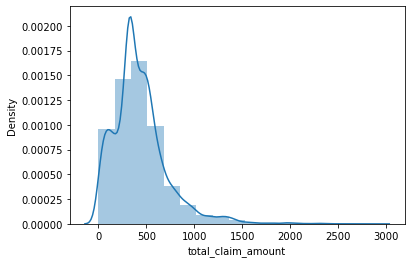

In [80]:
sns.distplot(dataframe['total_claim_amount'], bins=17)

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns


In [82]:
# a plot of the response rate by the total claim amount, dist. of the total claim amount, broken down by response kind. 
# boxplot and distribution plot, for each response kind.

In [86]:
sns.distplot(dataframe[x="total_claim_amount", hue="response"].plot(kind="bar")

SyntaxError: invalid syntax (<ipython-input-86-e6f29289780f>, line 1)

In [87]:
#a plot of the response rate by income. Create similar plots like in the task before, but for Income

<AxesSubplot:xlabel='response', ylabel='income'>

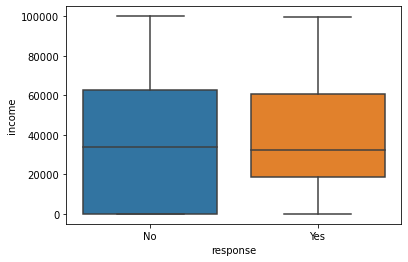

In [88]:
sns.boxplot(y="income", x="response", data = dataframe)